In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

## Overview of data 

This file contains data from cardiotocograms exams, a cost accessible option to assess fetal health, which allows healthcare professions to intervene, if necessary, to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.


There are 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes of fetal health:

+ Normal (1)
+ Suspect (2)
+ Pathological (3)


The features of the data are as followed:

+ 'baseline value' FHR baseline (beats per minute)
+ 'accelerations' Number of accelerations per second
+ 'fetal_movement' Number of fetal movements per second
+ 'uterine_contractions' Number of uterine contractions per second
+ 'light_decelerations' Number of light decelerations per second
+ 'severe_decelerations' Number of severe decelerations per second
+ 'prolongued_decelerations' Number of prolonged decelerations per second
+ 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
+ 'mean_value_of_short_term_variability' Mean value of short term variability
+ 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
+ 'mean_value_of_long_term_variability' Mean value of long term variability
+ 'histogram_width' Width of FHR histogram
+ 'histogram_min' Minimum (low frequency) of FHR histogram
+ 'histogram_max' Maximum (high frequency) of FHR histogram
+ 'histogram_number_of_peaks' Number of histogram peaks
+ 'histogram_number_of_zeroes' Number of histogram zeros
+ 'histogram_mode' Histogram mode
+ 'histogram_mean' Histogram mean
+ 'histogram_median' Histogram median
+ 'histogram_variance' Histogram variance
+ 'histogram_tendency' Histogram tendency

The target column: 
+ 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

## Exploratory analysis

In [28]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [30]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [31]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

After investigating the data for null and nan values, I chose to look further into all features before the target, fetal health, specifically.

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Although describe() gives us a nice overview, visualizations make it easier to understand the data. Firstly, I looked into feature skewness.

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

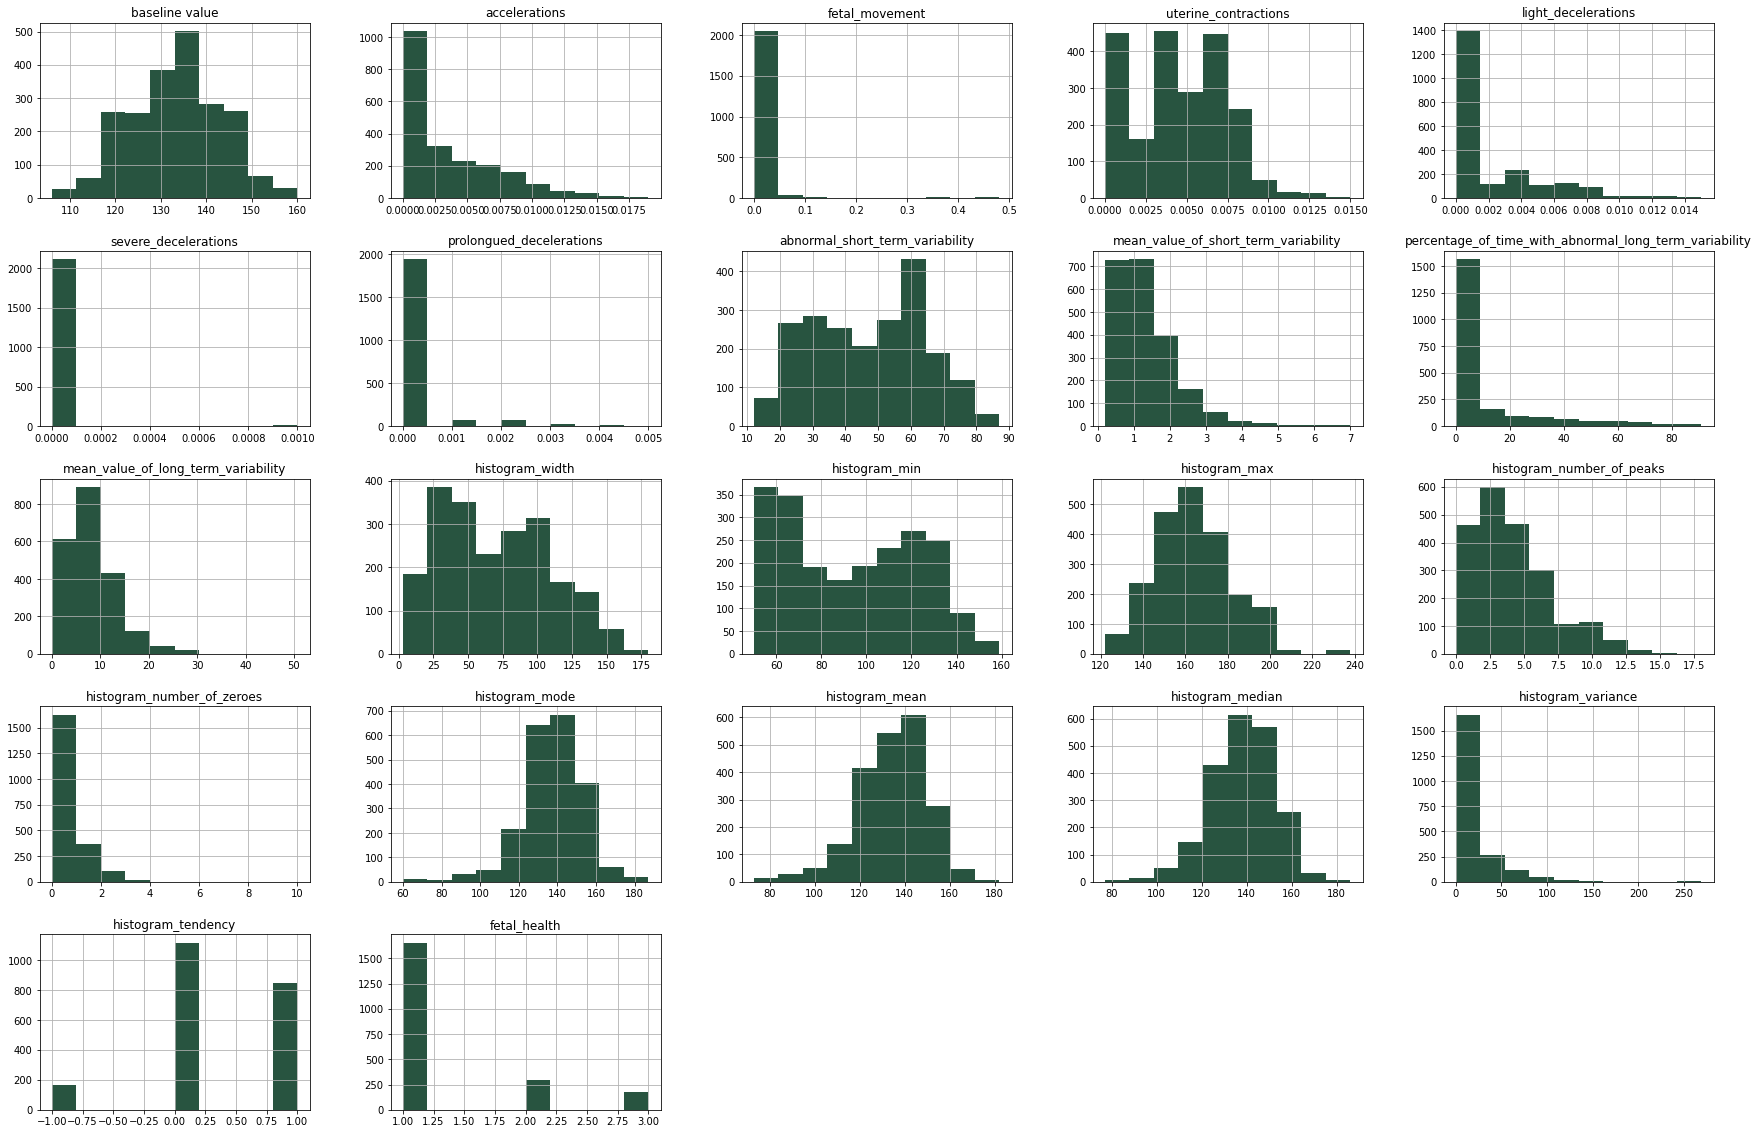

In [33]:
df.hist(figsize = (30,20), color = "#285440")

As seen above most of the features have either a postively-skewed or normal distribution. 

Secondly, I wanted to see the range of feature attributes. 

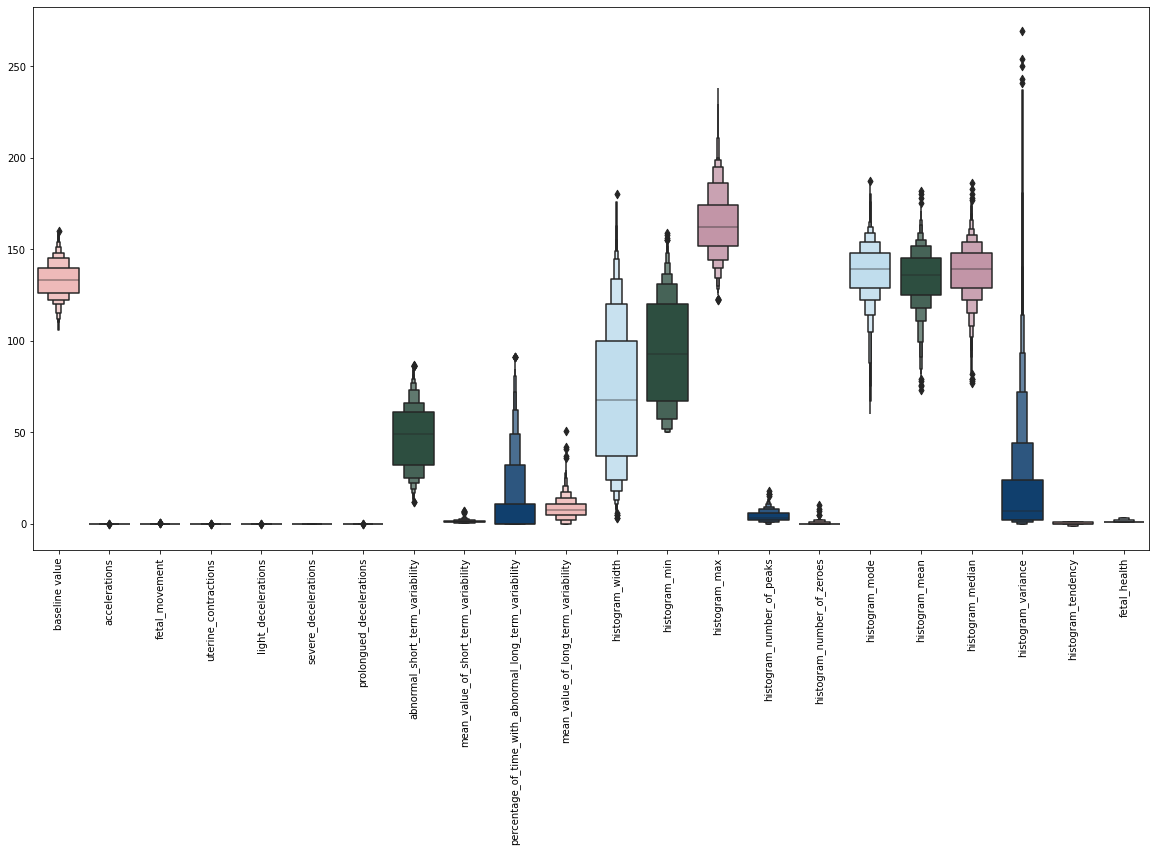

In [34]:
shades =["#f7b2b0","#b8dff5", "#285440","#c98ea6", "#003f7d"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = shades)
plt.xticks(rotation=90)
plt.show()

The above plots shows that all features are in different ranges. In order to proceed with a model, the features must be scaled to the same range.

Now that I have a better overview of the features, I will evaluate the target and find out whether or not there is an imbalance. 

In [35]:
df.groupby("fetal_health").size()

fetal_health
1.0    1655
2.0     295
3.0     176
dtype: int64

In [36]:
total = len(df.fetal_health)
health_name = ['normal', 'suspect', 'pathological']
normal = round(1655/total * 100, 2)
suspect = round(295/total * 100, 2)
pathological = round(176/total * 100, 2)
print(f"The percent of report normal, suspect, and pathological fetuses are as followed: {normal, suspect, pathological}")

The percent of report normal, suspect, and pathological fetuses are as followed: (77.85, 13.88, 8.28)


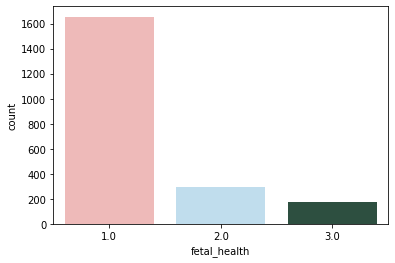

In [37]:
fig= figsize=(15, 5)
colors = ["#f7b2b0","#b8dff5", "#285440"]
sns.countplot(data= df, x=("fetal_health"),palette = colors)
plt.show()

The count plot indicates an imbalance of in data, which may lead to misleading classification accuracy. In order to provide better insight, a correlation matrix and heat map will be used to see whether fetal health has a connection with any features. 

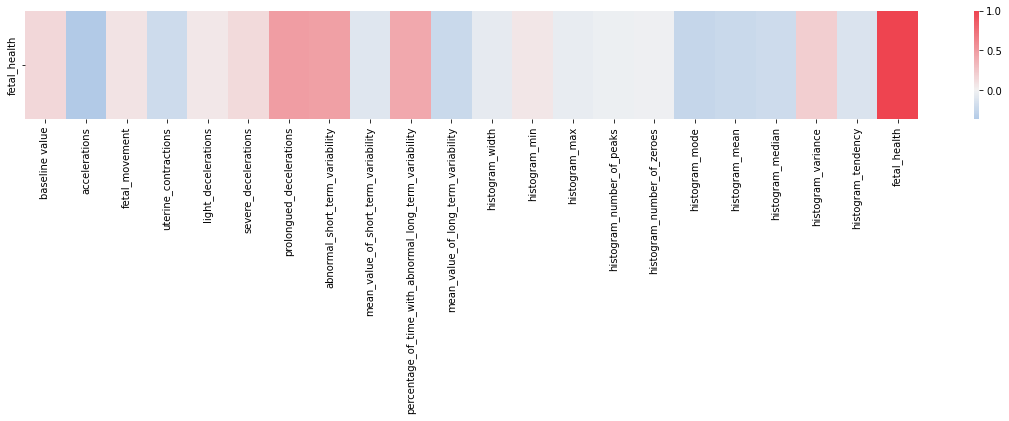

In [38]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,2))  
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
ax = sns.heatmap(corrmat.sort_values(by=["fetal_health"], ascending=False).head(1),cmap=cmap, center=0)

In [39]:
Num_feature = corrmat["fetal_health"].sort_values(ascending=False).head(22).to_frame()
style = Num_feature.style.background_gradient(cmap=cmap)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


<AxesSubplot:>

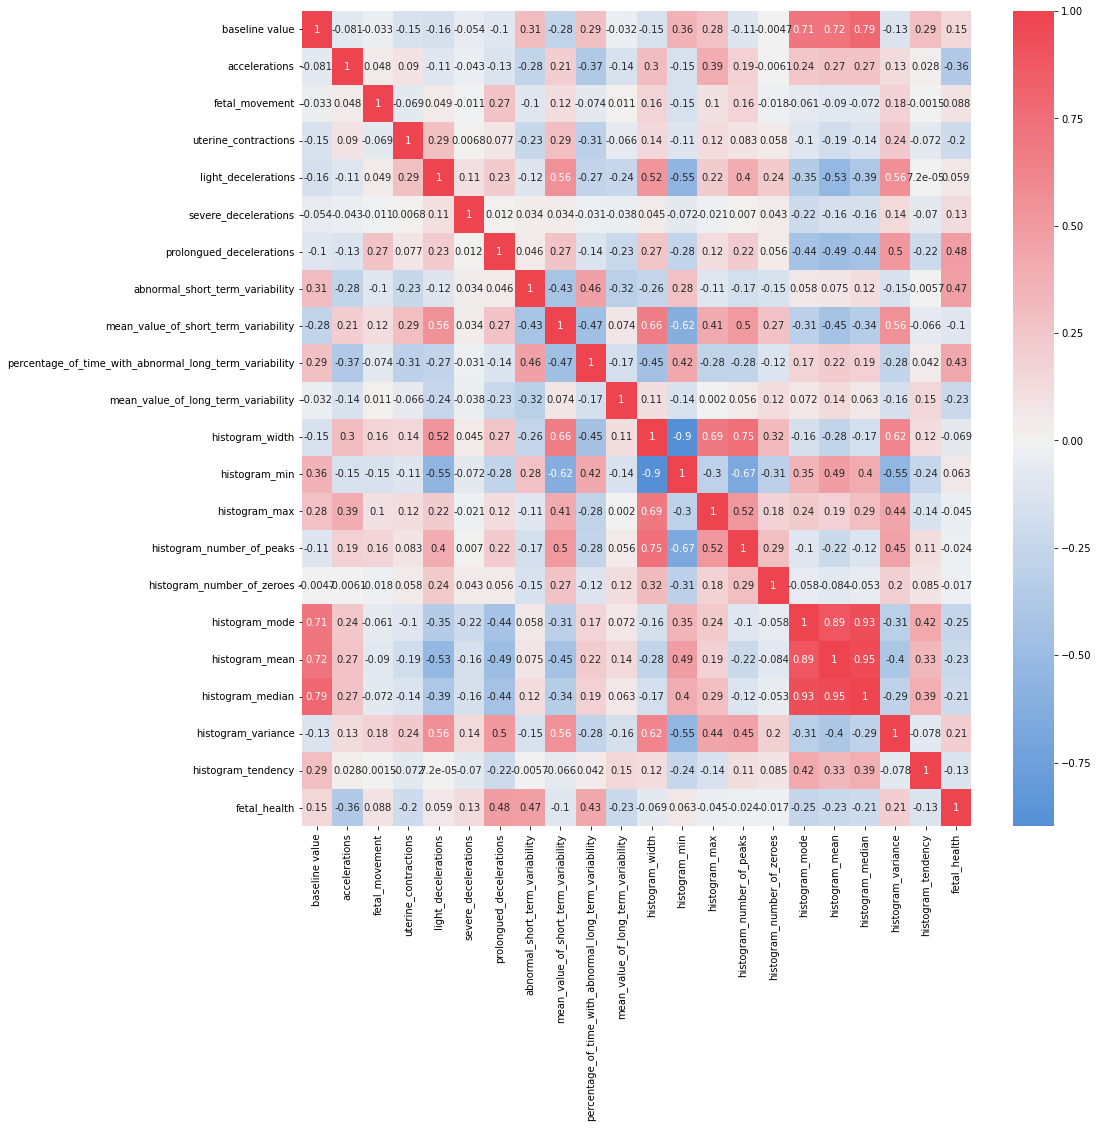

In [40]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True, cmap = cmap, center = 0) 

Based on the correlation matix and heatmap, it is clear that "accelerations", "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", and "mean_value_of_long_term_variability" are highly correlated with fetal_health.

## Model Building 

In [41]:
#assigning values to features as X and target as y
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

#setting up a standard scaler for the features 
col_names = list(X.columns)
scaler = StandardScaler()
X_df= scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T
X_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


To visualize that scaling the data worked, I plotted the data once more. 

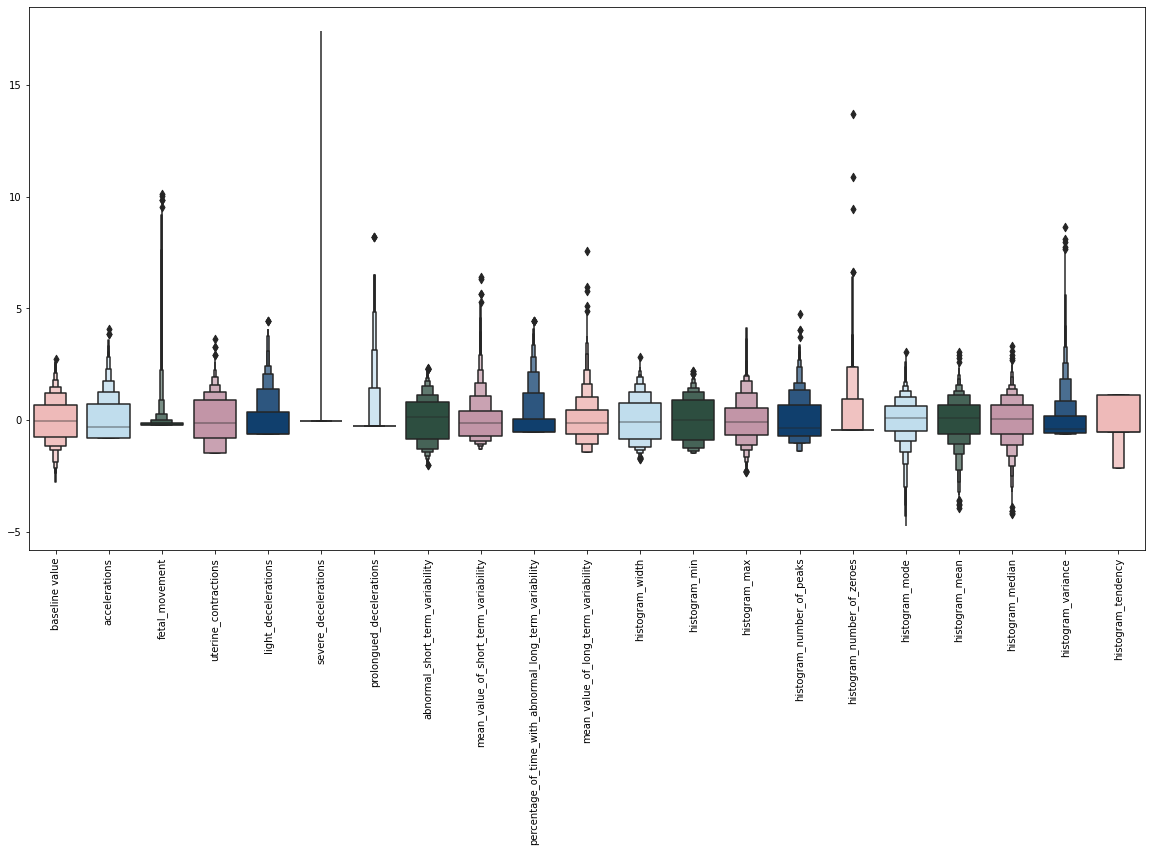

In [42]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

As seen above, all features are within the same range. 

In [43]:
#splitting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [44]:
#using pipeline to quickly select model
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_knn=Pipeline([('KNeighborsClassifier', KNeighborsClassifier())])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

#list of pipelines
pipelines = [pipeline_lr, pipeline_knn, pipeline_dt, pipeline_rf, pipeline_svc]

#dictionary of pipelines and classifiers for reference
pipeline_dict = {0: 'Logistic Regression', 1: 'KNeighborsClassifier', 2: 'Decision Tree', 3: 'Random Forest', 4: 'SVC'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#accuracy scores for models
for i, model in enumerate(pipelines):
    pred_model= model.predict(X_test)
    accuracy = accuracy_score(y_test, pred_model)
    print("%s: %f " % (pipeline_dict[i], accuracy))

print('------')

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], cv_score.mean()))

Logistic Regression: 0.880878 
KNeighborsClassifier: 0.909091 
Decision Tree: 0.938871 
Random Forest: 0.946708 
SVC: 0.916928 
------
Logistic Regression: 0.897170 
KNeighborsClassifier: 0.894504 
Decision Tree: 0.916683 
Random Forest: 0.935512 
SVC: 0.906594 


In [45]:
#for i, model in enumerate(pipelines):
    #pred_model= model.predict(X_test)
    #class_report = classification_report(y_test, pred_model)
    #print(class_report, pipeline_dict[i])
#was going to do a classification report for each model,but chose against it

Random forest appears to be the most accurate amongst the models. In order to build a better random forest, I'll use grid search cv.

In [30]:
# a dictionary with a list of optional values
parameters = {"n_estimators" :[100, 150, 200, 500, 700],
              "max_features" : ['auto', 'sqrt', 'log2'],
              "criterion": ['gini'],
              'max_depth' : [4,6,8,12,14,16],
              'n_jobs':[-1,1,None]}

In [31]:
# fitting the training set to find parameters with best accuracy 
CV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=parameters, 
                                cv=5)
CV_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 6, 8, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 500, 700],
                         'n_jobs': [-1, 1, None]})

In [32]:
CV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'log2',
 'n_estimators': 150,
 'n_jobs': -1}

In [33]:
random_forest = RandomForestClassifier(**CV_RF.best_params_)
RF_model = random_forest.fit(X_train, y_train)

predictions_RF =RF_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
accuracy_RF = accuracy_score(y_test,predictions_RF)
mse_random_forest = mean_squared_error(y_test, predictions_RF)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, predictions_RF))
score_random_forest_train = RF_model.score(X_train, y_train)
score_random_forest_test = RF_model.score(X_test, y_test)

In [35]:
print(f"Accuracy for Random Forest = {round(accuracy_RF, 3)}")
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Accuracy for Random Forest = 0.94
Mean Square Error for Random Forest = 0.083
Root Mean Square Error for Random Forest = 0.288
R^2(coefficient of determination) on training set = 1.0
R^2(coefficient of determination) on testing set = 0.94


In [36]:
class_report = classification_report(y_test, predictions_RF)
print(class_report)

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.90      0.76      0.82       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.94       638
   macro avg       0.90      0.89      0.89       638
weighted avg       0.94      0.94      0.94       638



<AxesSubplot:>

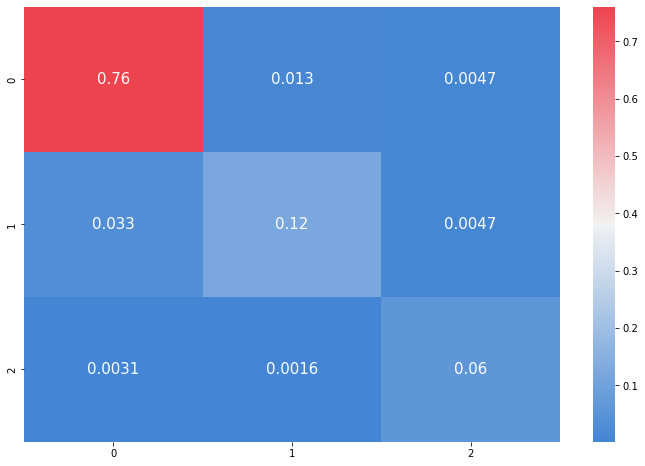

In [37]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions_RF)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

For the heatmap above, fetal health is classified as followed:
+ Normal (0)
+ Suspect (1)
+ Pathological (2)

The chosen random forest model is excellent in predicting Normal fetal health, but lacks the power to accurately predict Suspect or Pathological cases. This is not surprising given the high count of Normal cases in the data.  